In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score

df = pd.read_csv('BankNote_Authentication.csv')

df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [2]:
# Split data between Independent and Dependent Features

x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

print(x.head())
print(y.head())

   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
   class
0      0
1      0
2      0
3      0
4      0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
clf_accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy Score with Decision Tree Classifier is: {}".format(clf_accuracy_score))

Accuracy Score with Decision Tree Classifier is: 0.9795918367346939


[Text(0.4991319444444444, 0.9444444444444444, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.3298611111111111, 0.8333333333333334, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.4144965277777778, 0.8888888888888888, 'True  '),
 Text(0.22916666666666666, 0.7222222222222222, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.05555555555555555, 0.5, 'x[1] <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1.0, 248.0]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

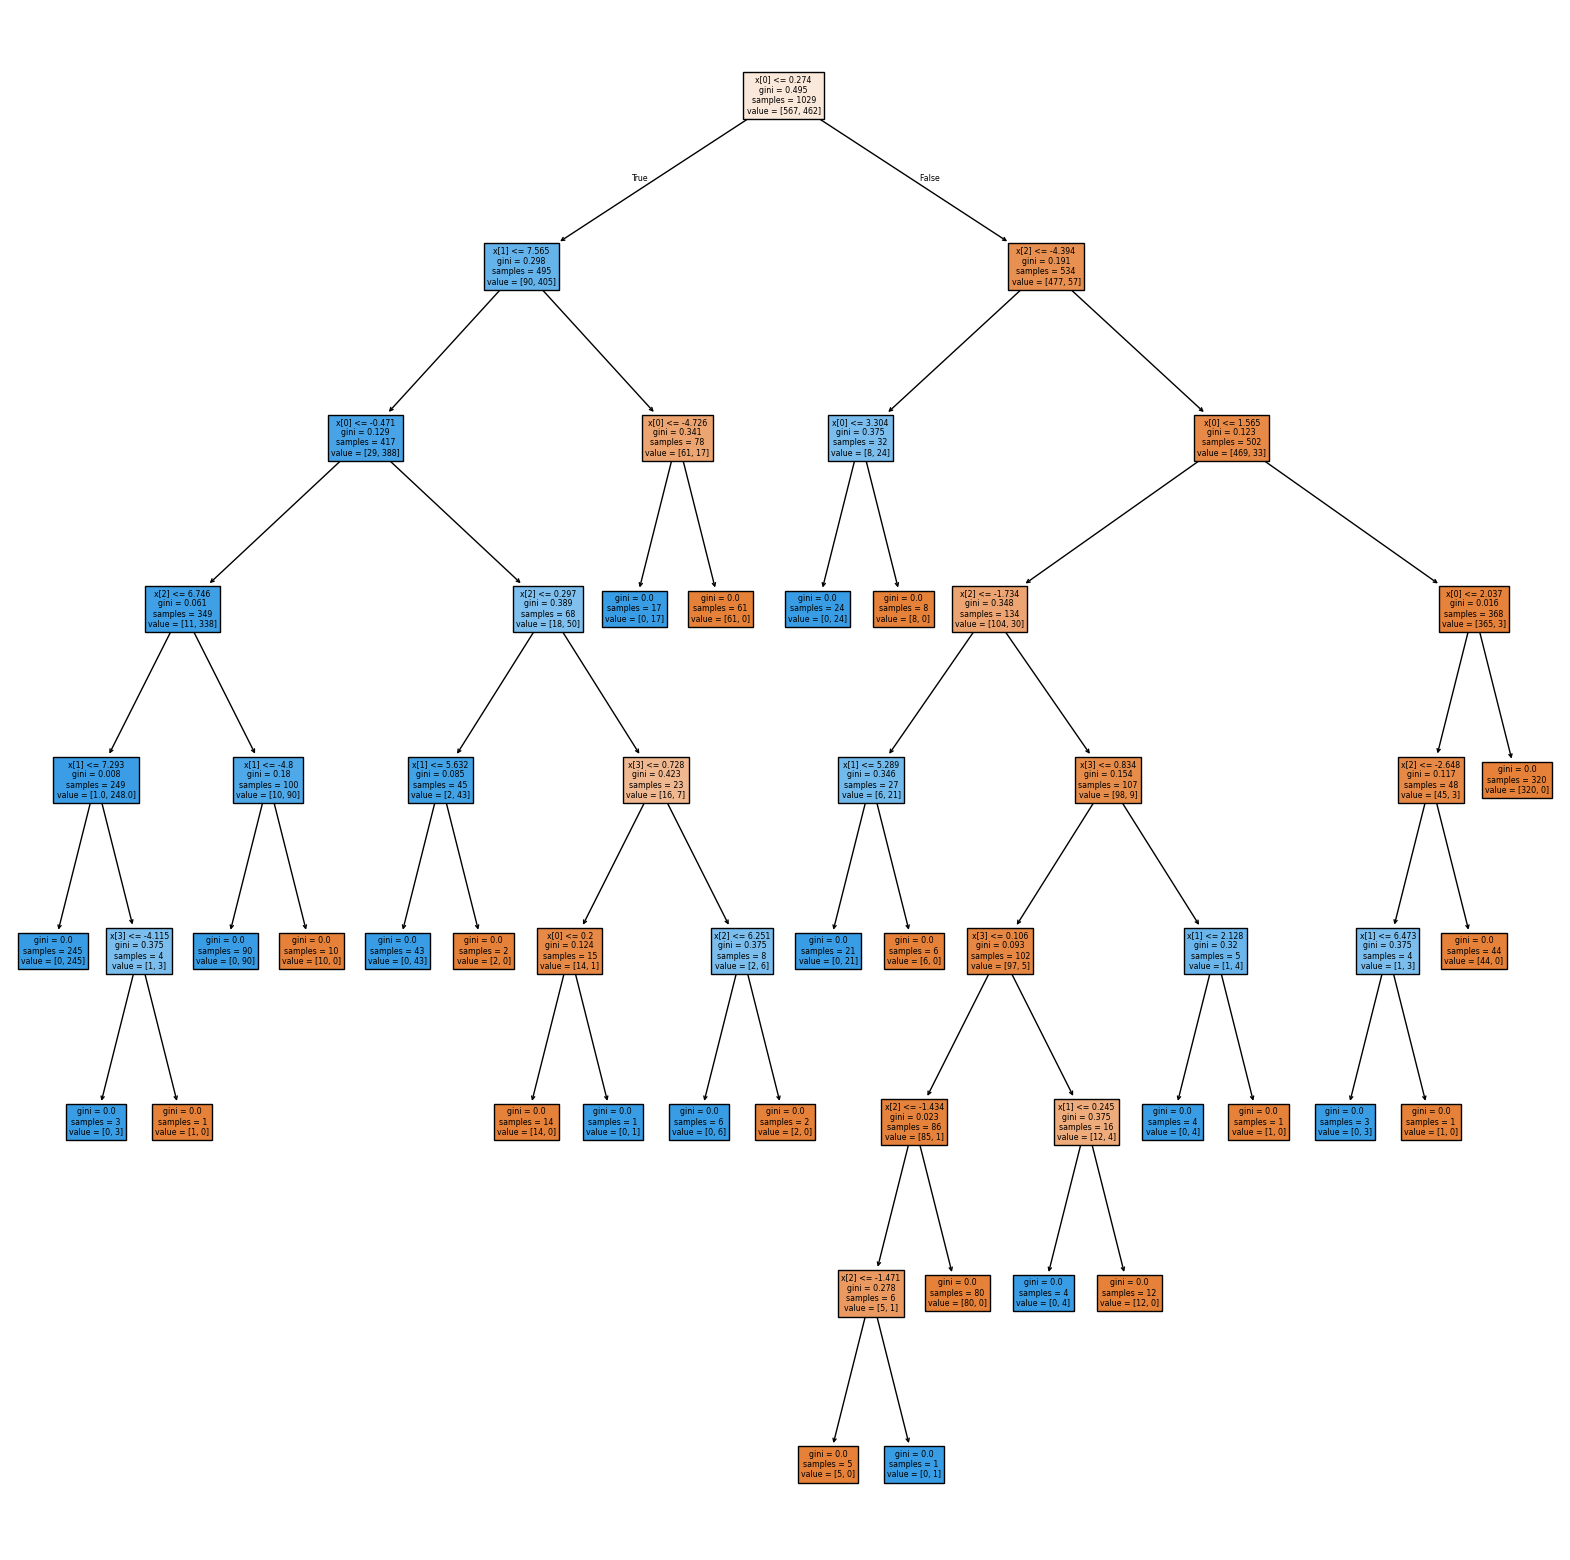

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)

In [5]:
# Post prunning decision tree wth cost complexity prunning
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas

array([0.        , 0.00096052, 0.00096791, 0.00145773, 0.00155491,
       0.00181406, 0.00216282, 0.00291545, 0.00366038, 0.0037145 ,
       0.00473514, 0.00522466, 0.00907029, 0.00933263, 0.01166181,
       0.01452427, 0.02584037, 0.0273762 , 0.0648363 , 0.25271008])

In [6]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25271007696401615


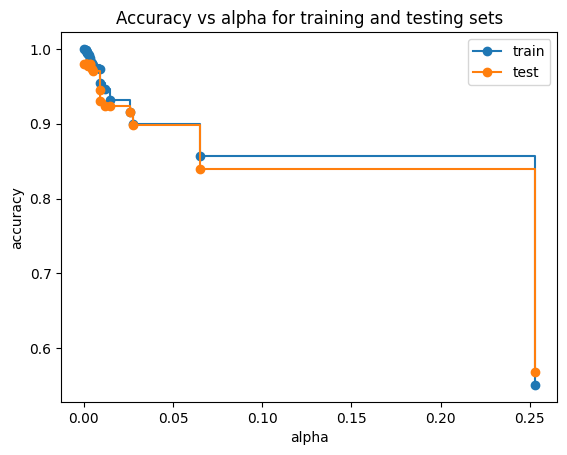

In [7]:
# Accuracy vs alpha for training and testing sets


train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [8]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf_accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy score with optimal alpha is: {}".format(clf_accuracy_score))

Accuracy score with optimal alpha is: 0.9795918367346939


[Text(0.46484375, 0.9375, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.28515625, 0.8125, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.375, 0.875, 'True  '),
 Text(0.1796875, 0.6875, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.0625, 0.5625, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.03125, 0.4375, 'gini = 0.008\nsamples = 249\nvalue = [1.0, 248.0]'),
 Text(0.09375, 0.4375, 'x[1] <= -4.8\ngini = 0.18\nsamples = 100\nvalue = [10, 90]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 90\nvalue = [0, 90]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.296875, 0.5625, 'x[2] <= 0.297\ngini = 0.389\nsamples = 68\nvalue = [18, 50]'),
 Text(0.21875, 0.4375, 'x[1] <= 5.632\ngini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),

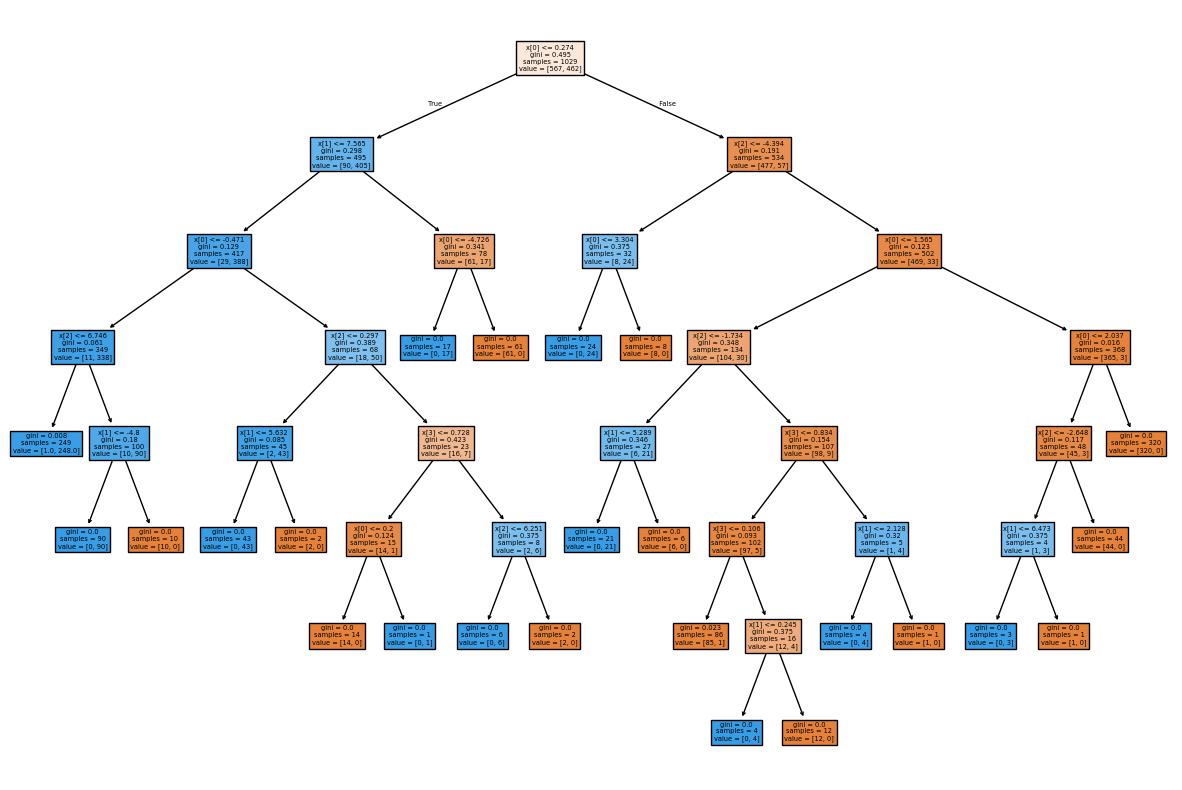

In [9]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)

# Random Forest Classifier

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

rf_accuracy_score = accuracy_score(y_test,y_pred)
print("Random Forest Accuracy Score: {}".format(rf_accuracy_score))

rf_r2_score = r2_score(y_test,y_pred)
print("Random Forest R2 Score: {}".format(rf_r2_score))

rf_roc_auc_score = roc_auc_score(y_test,y_pred)
print("Random Forest ROC AUC Score: {}".format(rf_roc_auc_score))

c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy Score: 0.9902912621359223
Random Forest R2 Score: 0.960536398467433
Random Forest ROC AUC Score: 0.9907567049808428
